# 柱状图

柱状图（Bar Chart）通过不同长度的柱子来表示数据的大小。每个柱子代表一个类别，柱子的长度或高度对应于该类别的数值。柱状图可以是垂直的（最常见的形式）或水平的。

**适用场景**
- **比较不同类别的数据**：例如，比较不同产品的销售量。
- **展示分类数据的分布**：例如，展示不同年龄段的人口比例。
- **展示时间序列数据的变化**：例如，展示每月的销售额变化。
- **展示部分与整体的关系**：例如，展示不同部门对公司总利润的贡献。

## sns.barplot
- `data`: DataFrame，包含用于绘图的数据。
- `x`: X轴变量名称。
- `y`: Y轴变量名称。
- `estimator`: y值的聚合方法。
    - mean：平均值，(默认)
    - sum：求和
    - median：中位数
    - max：最大值
    - min：最小值
- `hue`: 字符串，指定DataFrame中用于颜色编码（hue）的列名。这个参数根据这个变量的类别来改变柱子的颜色，从而在同一图表中比较不同组的数据
- `errorbar`: 用于控制误差条的显示
    - None：不显示误差条。
    - 'ci'：显示置信区间（默认值）。
    - 'sd'：显示标准差。
    - 'se'：显示标准误。

## 柱状图案例

**tips**: 餐饮小费数据集
- total_bill：账单金额
- tip：小费金额
- sex：性别（Male 或 Female）
- smoker：是否吸烟（Yes 或 No）
- day：星期几（Sun, Thu, Fri, Sat）
- time：就餐时间（Lunch 或 Dinner）
- size：就餐人数

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载小费tips数据集
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 基本柱状图

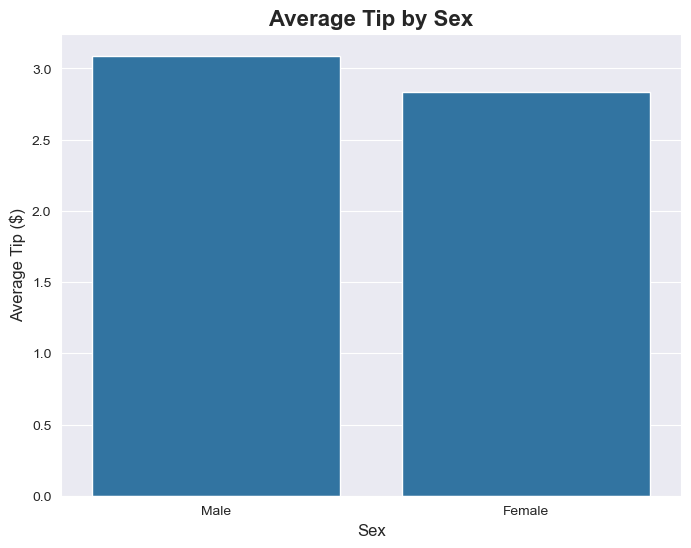

In [12]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制不同性别顾客给的小费的柱状图
sns.barplot(x='sex', y='tip', data=tips, errorbar=None)

# 设置标题和标签
plt.title('Average Tip by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Average Tip ($)', fontsize=12)

# 显示图表
plt.show()

### 柱状图上显示数值

**ax.annotate()**: 用来在指定位置添加注释或文本。通过这个方法，我们可以在图表中任意位置放置文本

- **p.get_x() + p.get_width() / 2**: 计算柱子的中点位置
    - p.get_x(): 获取柱子的左边界位置（即柱子的起始点）
    - p.get_width(): 获取柱子的宽度
- **p.get_height()+0.03**: 加一个偏移量，目的是将数值显示在柱子的顶部略微上方
    - p.get_height(): 获取柱子的高度
- **ha='center'**：控制文本的水平对齐方式
    - center: 居中对齐
    - left: 左对齐
    - right: 右对齐
- **va='center'**：控制文本的垂直对齐方式
    - center: 居中对齐
    - left: 左对齐
    - right: 右对齐
- **fontsize=12**：设置文本的字体大小为 12。
- **color='black'**：设置文本的颜色为黑色。
- **fontweight='bold'**：设置文本为加粗字体。
    - normal: 正常粗细，默认值
    - bold:  加粗
    - light: 变细

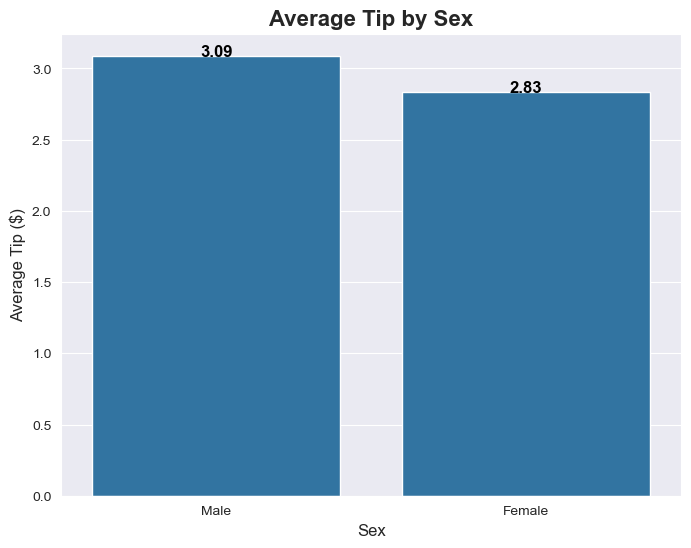

In [15]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽10英寸，高6英寸

# 绘制不同性别顾客给的小费的柱状图
ax = sns.barplot(x='sex', y='tip', data=tips, errorbar=None)

# 设置标题和标签
plt.title('Average Tip by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Average Tip ($)', fontsize=12)

# 在每个柱子顶部显示值
# 循环遍历每个柱子（ax.patches），p表示每一个柱子
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # 显示柱子的高度（即小费）
                (p.get_x() + p.get_width() / 2., p.get_height()+0.03),  # 显示位置
                ha='center', va='center', fontsize=12, color='black', fontweight='bold') # 设置文本属性

# 显示图表
plt.show()

### `estimator`-y 轴的聚合方法

- mean：平均值，(默认)
- sum：求和
- median：中位数
- max：最大值
- min：最小值

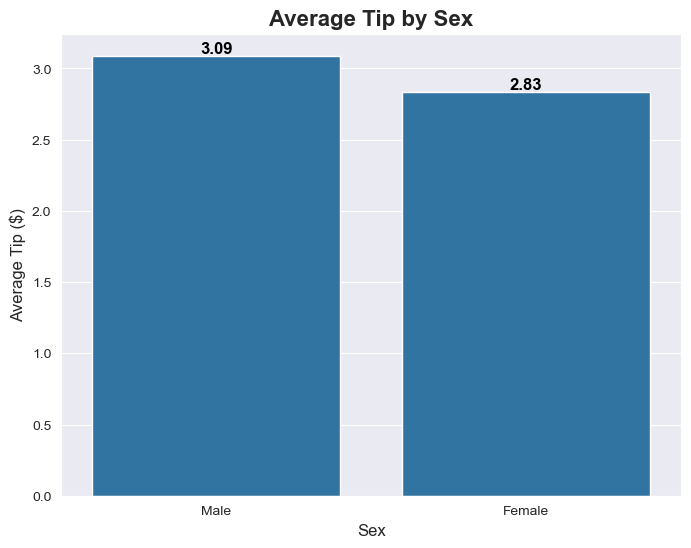

In [27]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽8英寸，高6英寸

# 绘制不同性别顾客给的小费的柱状图
ax = sns.barplot(x='sex', y='tip', data=tips, errorbar=None, estimator='mean')

# 设置标题和标签
plt.title('Average Tip by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Average Tip ($)', fontsize=12)

# 在每个柱子顶部显示值
# 循环遍历每个柱子（ax.patches），p表示每一个柱子
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # 显示柱子的高度（即小费）
                (p.get_x() + p.get_width() / 2., p.get_height()+0.05),  # 显示位置
                ha='center', va='center', fontsize=12, color='black', fontweight='bold') # 设置文本属性

# 显示图表
plt.show()

### hue-同位置多柱状图

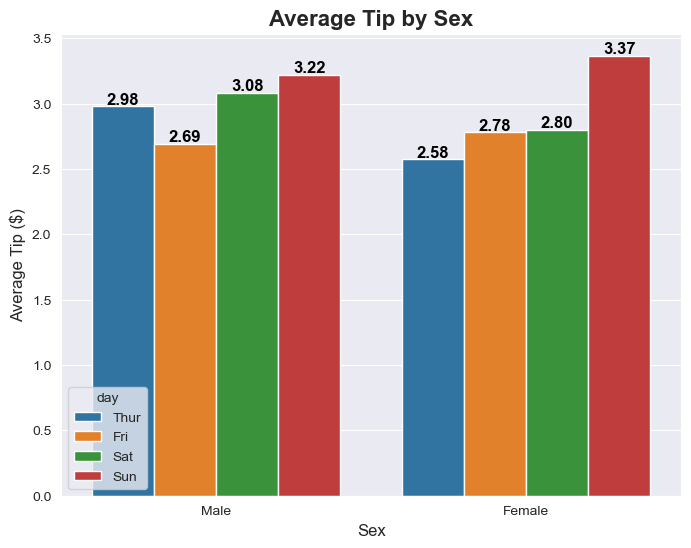

In [32]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽10英寸，高6英寸

# 分日期绘制不同性别顾客给的小费的柱状图
ax = sns.barplot(x='sex', y='tip', data=tips, errorbar=None, hue='day')

# 设置标题和标签
plt.title('Average Tip by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Average Tip ($)', fontsize=12)

# 在每个柱子顶部显示值
# 循环遍历每个柱子（ax.patches），p表示每一个柱子
for p in ax.patches:
    if p.get_width()==0:
        continue
    ax.annotate(f'{p.get_height():.2f}',  # 显示柱子的高度（即小费）
                (p.get_x() + p.get_width() / 2., p.get_height()+0.05),  # 显示位置
                ha='center', va='center', fontsize=12, color='black', fontweight='bold') # 设置文本属性

# 显示图表
plt.show()

### 水平柱状图

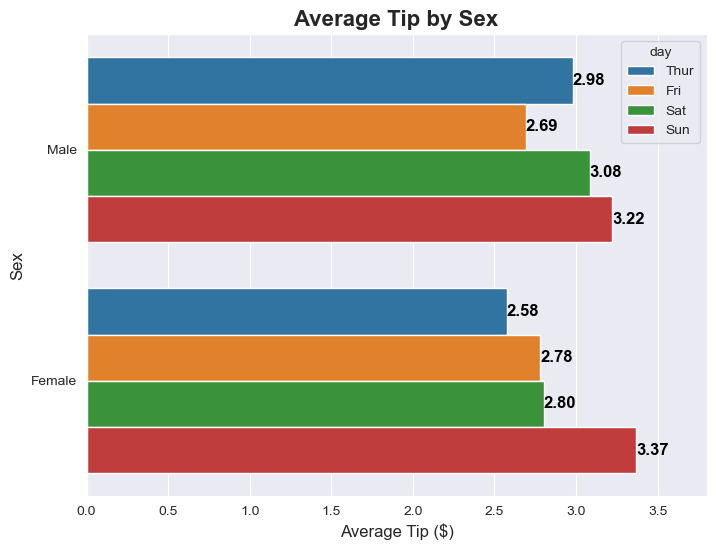

In [33]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽10英寸，高6英寸

# 分日期绘制不同性别顾客给的小费的柱状图
ax = sns.barplot(x='tip', y='sex', data=tips, errorbar=None, hue='day')

# 设置标题和标签
plt.title('Average Tip by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Average Tip ($)', fontsize=12)
plt.ylabel('Sex', fontsize=12)

# 在每个柱子顶部显示值
# 循环遍历每个柱子（ax.patches），p表示每一个柱子
for p in ax.patches:
    if p.get_width()==0:
        continue
    ax.annotate(f'{p.get_width():.2f}',  # 显示柱子的高度（即小费）
                (p.get_width() + 0.1, p.get_y()+p.get_height() / 2.),  # 显示位置
                ha='center', va='center', fontsize=12, color='black', fontweight='bold') # 设置文本属性

# 设置 x 轴范围
plt.xlim(0, 3.8)  # 设置x轴范围从0到5

# 显示图表
plt.show()

## errorbar参数介绍

errorbar参数用于控制误差条的显示：
- `None`：不显示误差条。
- `ci`：显示置信区间。
- `sd`：显示标准差。
- `se`：显示标准误。

### errorbar=None

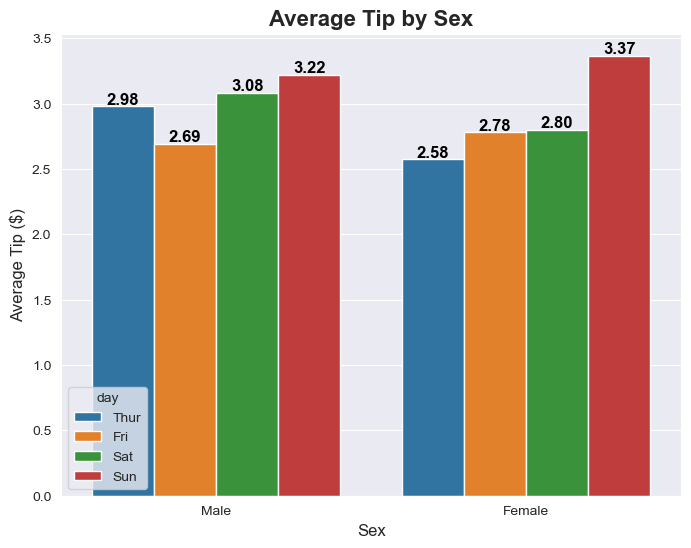

In [34]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽10英寸，高6英寸

# 分日期绘制不同性别顾客给的小费的柱状图
ax = sns.barplot(x='sex', y='tip', data=tips, errorbar=None, hue='day')

# 设置标题和标签
plt.title('Average Tip by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Average Tip ($)', fontsize=12)

# 在每个柱子顶部显示值
# 循环遍历每个柱子（ax.patches），p表示每一个柱子
for p in ax.patches:
    if p.get_width()==0:
        continue
    ax.annotate(f'{p.get_height():.2f}',  # 显示柱子的高度（即小费）
                (p.get_x() + p.get_width() / 2., p.get_height()+0.05),  # 显示位置
                ha='center', va='center', fontsize=12, color='black', fontweight='bold') # 设置文本属性

# 显示图表
plt.show()

### errorbar='ci'

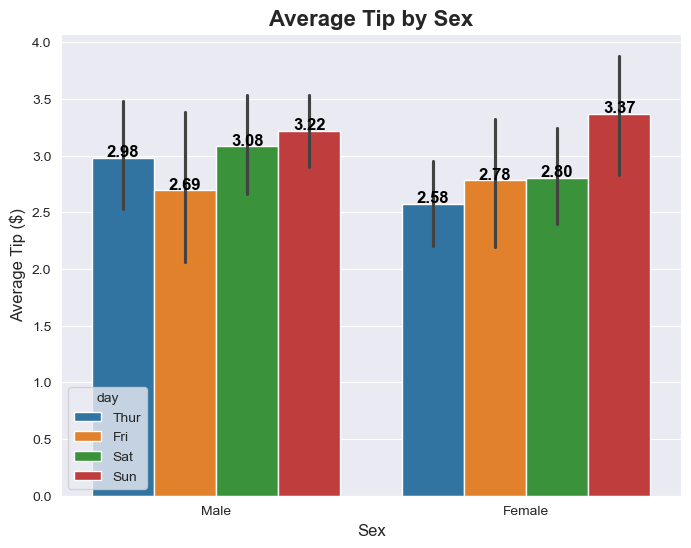

In [35]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽10英寸，高6英寸

# 分日期绘制不同性别顾客给的小费的柱状图
ax = sns.barplot(x='sex', y='tip', data=tips, errorbar=('ci',95), hue='day')

# 设置标题和标签
plt.title('Average Tip by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Average Tip ($)', fontsize=12)

# 在每个柱子顶部显示值
# 循环遍历每个柱子（ax.patches），p表示每一个柱子
for p in ax.patches:
    if p.get_width()==0:
        continue
    ax.annotate(f'{p.get_height():.2f}',  # 显示柱子的高度（即小费）
                (p.get_x() + p.get_width() / 2., p.get_height()+0.05),  # 显示位置
                ha='center', va='center', fontsize=12, color='black', fontweight='bold') # 设置文本属性

# 显示图表
plt.show()

### errorbar='sd'

`sd`：显示标准差

标准差是用来衡量数据集的离散程度或波动性的一种度量，反映了数据点与数据平均值之间的差异。标准差公式如下：
$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$$
其中：
- $x_i$ 是每个数据点
- $\mu$ 是数据的均值
- $N$ 是数据点的总数

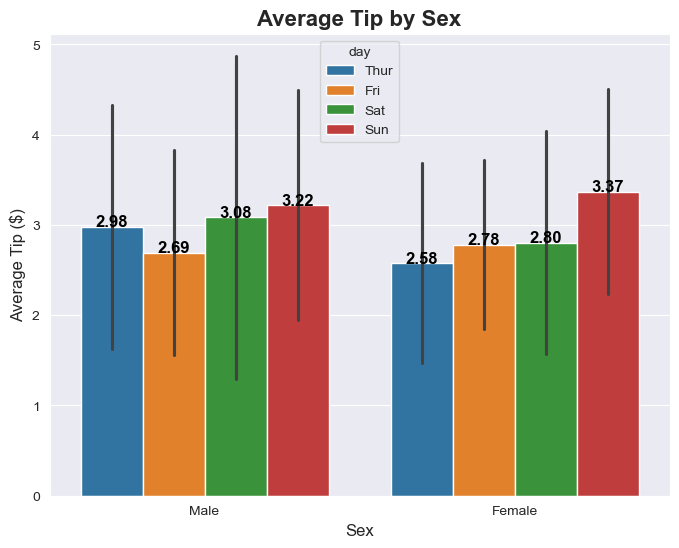

In [36]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽10英寸，高6英寸

# 分日期绘制不同性别顾客给的小费的柱状图
ax = sns.barplot(x='sex', y='tip', data=tips, errorbar='sd', hue='day')

# 设置标题和标签
plt.title('Average Tip by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Average Tip ($)', fontsize=12)

# 在每个柱子顶部显示值
# 循环遍历每个柱子（ax.patches），p表示每一个柱子
for p in ax.patches:
    if p.get_width()==0:
        continue
    ax.annotate(f'{p.get_height():.2f}',  # 显示柱子的高度（即小费）
                (p.get_x() + p.get_width() / 2., p.get_height()+0.05),  # 显示位置
                ha='center', va='center', fontsize=12, color='black', fontweight='bold') # 设置文本属性

# 显示图表
plt.show()

### errorbar='se'

`sd`：显示标准误

标准误是样本均值的标准差，用于衡量样本均值的不确定性或估计误差，反映了如果多次抽样样本均值与真实总体均值之间的偏差可能是多少。标准误公式如下：
$$SE = \frac{\sigma}{\sqrt{n}} $$
其中：
- $\sigma$是样本标准差
- $n$是样本的大小

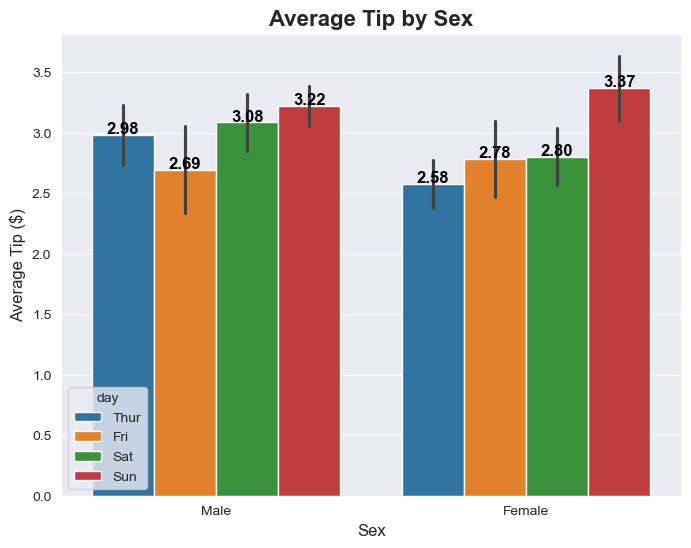

In [37]:
# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 设置图片大小
plt.figure(figsize=(8, 6))  # 设置宽10英寸，高6英寸

# 分日期绘制不同性别顾客给的小费的柱状图
ax = sns.barplot(x='sex', y='tip', data=tips, errorbar='se', hue='day')

# 设置标题和标签
plt.title('Average Tip by Sex', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Average Tip ($)', fontsize=12)

# 在每个柱子顶部显示值
# 循环遍历每个柱子（ax.patches），p表示每一个柱子
for p in ax.patches:
    if p.get_width()==0:
        continue
    ax.annotate(f'{p.get_height():.2f}',  # 显示柱子的高度（即小费）
                (p.get_x() + p.get_width() / 2., p.get_height()+0.05),  # 显示位置
                ha='center', va='center', fontsize=12, color='black', fontweight='bold') # 设置文本属性

# 显示图表
plt.show()